**Train-Valid:** 2011-2019  
**Test:** 2020 and 2021

In [1]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==1.2.1
!pip install scikeras
!pip install autokeras

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 64.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.8/466.8 KB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 100.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 KB 10.5 MB/s eta 0:00:00
INFO: pip is

## Import Packages & Data

In [2]:
!pip install -U neptune-client
import sys
import os
import numpy as np
import pandas as pd
# import calendar
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,metrics
import tensorflow.keras.backend as K
from keras.optimizers import Adam
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,GRU,Conv1D,Conv2D,Flatten,Input,ConvLSTM1D,ConvLSTM2D,Dropout,BatchNormalization
from sklearn.model_selection import TimeSeriesSplit,GridSearchCV,RandomizedSearchCV
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.constraints import MaxNorm
from sklearn.model_selection import train_test_split
import neptune.new as neptune 
from collections import Counter, defaultdict
import pickle
from autokeras import StructuredDataClassifier
import kerastuner
seed=42


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.6/442.6 KB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 KB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 94.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.8/136.8 KB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 KB 7.8 MB/s eta 0:00:00


/usr/local/lib/python3.9/dist-packages/neptune/internal/backends/hosted_client.py:50: NeptuneDeprecationWarning: The 'neptune-client' package has been deprecated and will be removed in the future. Install the 'neptune' package instead. For more, see https://docs.neptune.ai/setup/upgrading/
  from neptune.version import version as neptune_client_version
<ipython-input-2-1a867707bf7c>:21: NeptuneDeprecationWarning: You're importing the Neptune client library via the deprecated `neptune.new` module, which will be removed in a future release. Import directly from `neptune` instead.
  import neptune.new as neptune
<ipython-input-2-1a867707bf7c>:25: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner


In [ ]:
print(tf.config.list_physical_devices())


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
tf.keras.utils.set_random_seed(seed)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# importing data and helper functions from directories dependent on which is available

joseph_path = '/content/drive/My Drive/DS_Modules/CA4021 (Final Year Project)/' # Joseph
julita_path = '/content/drive/My Drive/CA4021 (Final Year Project)/' # Julita

if os.path.exists(joseph_path):
  print("Importing from DS_Modules/CA4021")
  sys.path.append(os.path.join(joseph_path, 'scripts'))
  path = joseph_path

elif os.path.exists(julita_path):
  print("Importing directly from CA4021 folder")
  sys.path.append(sys.path.append(os.path.join(julita_path, 'scripts')))
  path = julita_path



Importing directly from CA4021 folder


In [5]:
# import helper functions from aux file (prevents too much function definitions in the notebook)
from aux_functions import missing_percentages, plot_dist_discrete, plot_dist_continuous, \
plot_vis_discrete, plot_vis_continuous, month_vplot

from aux_functions_ml import preprocess, manual_cross_validate, get_feat_importance_df, \
performance_report, calc_mean_importance, plot_importance, heidke_skill_score,score_model

# import train/valid and test sets
df_train = pd.read_csv(os.path.join(path,'data/train_data.csv'))
df_train.index=pd.to_datetime(df_train.date_time)
df_train.date_time = df_train.index

df_test = pd.read_csv(os.path.join(path,'data/test_data.csv'))
df_test.index=pd.to_datetime(df_test.date_time)
df_test.date_time = df_test.index

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

print("Train/valid:", df_train.shape)
print("Test:", df_test.shape)

Train/valid: (78888, 57)
Test: (17544, 57)


In [6]:
# LEAVING OUT w, ww, pweather and weather because of OH encoding sparsity

metadata = ['date', 'date_time', 'year', 'month', 'day', 'hour', 'season']
indicator = [col for col in df_train.columns if col[0] == 'i']
constant = [var for var in df_train.columns if len(df_train[var].value_counts()) == 1]
codes = ['sp1', 'sp2', 'sp3', 'sp4', 'wwa', 'wa', 'w' ,'ww', 'pweather', 'weather']
excluded = indicator + constant + codes + ['rgauge', 'sog', 'tabspeed', 'msl']
vis_vars=['target_hr1', 'vis_hr1', 'fog_formation', 'fog_dissipation', 'transition']
target = 'target_hr1'

categorical=['fog_state', 'season', 'tsig1', 'tsig2', 'tsig3', 'pchar'] #'w', 'ww', 'pweather',
             #'weather']
discrete = [var for var in df_train.columns if len(df_train[var].unique()) < 15 and 
             var not in excluded + categorical + metadata + codes + indicator + vis_vars]

continuous = [var for var in df_train.columns if var not in discrete + excluded + categorical + metadata + codes + indicator + vis_vars]
numerical = discrete+continuous
# conservative list of variables known to have an impact on fog formation.
# the other lists are too big for certain visualisations
fog_vars = ['rainfall', 'drybulb', 'cbl', 'ntot', 'dni', 'dewpt', 'speed', 'dir', 'rh']
# selected variables from XGBoost notebook
vars_sel = ['vis', 'temp_dew_dist', 'rh', 'ceiling', 'duration', 'hsig2', 'dni', 
                  'dewpt', 'drybulb', 'cbl', 'hlc', 'ntot', 'speed', 'vp', 'pchar','dir']
num_vars_sel = [var for var in vars_sel if var in discrete+continuous]
cat_vars_sel = [var for var in vars_sel if var in categorical]

dates = df_train.date_time
X = df_train[numerical + categorical + vis_vars].reset_index(drop=True)
y = X.pop(target)

# create train and test from X, without including df_test
pre_X_train, pre_X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.23, shuffle=False, random_state=seed)

# creating training sets using only the selected features
X_train, X_valid = preprocess(pre_X_train, pre_X_valid, cat_vars=cat_vars_sel, num_vars=num_vars_sel,cat_encoder='oh')

# create training data using all the variables df_train (for comparison)
X_train_all, X_test_all = preprocess(pre_X_train, pre_X_valid, cat_vars=categorical, num_vars=numerical,cat_encoder='oh')

In [ ]:
pre_X_valid.head()

,clow,cmedium,chigh,nlc,ntot,nsig1,nsig2,nsig3,nsig4,tsig4,duration,sunshine,dir,speed,vis,ptend,cbl,drybulb,wetbulb,dewpt,vp,rh,hlc,hsig1,hsig2,hsig3,hsig4,ceiling,dos,rainfall,tabdir,dni,temp_dew_dist,rainfall12hma,fog_state,season,tsig1,tsig2,tsig3,pchar,vis_hr1,fog_formation,fog_dissipation,transition
60743,5.0,0.0,0.0,7,7,1,7.0,0.0,0.0,0.0,0.0,0.0,22,8,25000,1.7,1017.6,8.7,7.3,5.7,9.1,81,18,18,32.0,0.0,0.0,32,0.0,0.0,22,0,3.0,-8.881784e-15,no fog,winter,7,6.0,0.0,6,25000.0,0,0,0
60744,5.0,0.0,0.0,7,7,1,7.0,0.0,0.0,0.0,0.0,0.0,21,11,25000,1.6,1017.1,9.0,7.5,5.8,9.2,80,18,18,32.0,0.0,0.0,32,0.0,0.0,22,0,3.2,-8.881784e-15,no fog,winter,7,6.0,0.0,6,25000.0,0,0,0
60745,5.0,0.0,0.0,7,7,1,7.0,0.0,0.0,0.0,0.0,0.0,20,8,25000,1.7,1016.4,9.5,7.8,5.9,9.2,78,18,18,30.0,0.0,0.0,30,0.0,0.0,20,0,3.6,-8.881784e-15,no fog,winter,7,6.0,0.0,8,25000.0,0,0,0
60746,5.0,0.0,0.0,7,7,1,7.0,0.0,0.0,0.0,0.0,0.0,21,10,25000,2.0,1015.6,9.8,8.0,6.0,9.3,77,18,18,30.0,0.0,0.0,30,0.0,0.0,21,0,3.8,-8.881784e-15,no fog,winter,7,6.0,0.0,8,25000.0,0,0,0
60747,5.0,0.0,0.0,7,7,1,7.0,0.0,0.0,0.0,0.0,0.0,22,12,25000,2.3,1014.8,9.8,8.0,6.0,9.3,77,18,18,32.0,0.0,0.0,32,0.0,0.0,22,0,3.8,-8.881784e-15,no fog,winter,7,6.0,0.0,8,25000.0,0,0,0


In [ ]:
X_valid.head()

,vis,temp_dew_dist,rh,ceiling,duration,hsig2,dni,dewpt,drybulb,cbl,hlc,ntot,speed,vp,dir,pchar_0,pchar_1,pchar_2,pchar_3,pchar_4,pchar_5,pchar_6,pchar_7,pchar_8
60743,-0.269299,-0.004030,-0.135296,-0.284854,-0.412199,-0.266548,-0.858595,-0.256145,-0.229161,1.212983,-0.103304,0.587607,-0.514436,-0.391955,0.159183,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
60744,-0.269299,0.082432,-0.220337,-0.284854,-0.412199,-0.266548,-0.858595,-0.233127,-0.167896,1.171003,-0.103304,0.587607,0.016999,-0.358727,0.037891,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
60745,-0.269299,0.255354,-0.390417,-0.314434,-0.412199,-0.296772,-0.858595,-0.210110,-0.065788,1.112230,-0.103304,0.587607,-0.514436,-0.358727,-0.083400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
60746,-0.269299,0.341816,-0.475458,-0.314434,-0.412199,-0.296772,-0.858595,-0.187092,-0.004524,1.045061,-0.103304,0.587607,-0.160146,-0.325499,0.037891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
60747,-0.269299,0.341816,-0.475458,-0.284854,-0.412199,-0.266548,-0.858595,-0.187092,-0.004524,0.977891,-0.103304,0.587607,0.194144,-0.325499,0.159183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
# for compatibility with TimeSeriesSplit
pre_X_train = pre_X_train.reset_index(drop=True)
pre_X_valid = pre_X_valid.reset_index(drop=True)

X_train = X_train.reset_index(drop=True)
X_valid = X_valid.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)

In [8]:
# find indices of transitions, and the index right before it
pre_X_valid[target] = y_valid
t_indices = pre_X_valid.loc[pre_X_valid['transition']==1].index
before_t_indices = t_indices - 1
t_indices = t_indices.append(before_t_indices)

# check if transition indices actually show fog state transitions
# the transition index should be 1 when there is a transition in the next hour, since we're predicting fog in the next hour
print(pre_X_valid.loc[t_indices[0]-2:t_indices[0]+2, ['fog_state', 'target_hr1', 'transition']])

    fog_state  target_hr1  transition
358    no fog           0           0
359    no fog           0           0
360    no fog           1           1
361       fog           1           0
362       fog           0           1


In [9]:
def data_preprocessing_sequences(X_or,Y_or,seq):
    inst = X_or.shape[0]
    feats = X_or.shape[1]

    X_seq = np.zeros((inst - seq+1, seq, feats))

    # the first sequence consists of the first 5 data points, and it moves up as a sliding window
    for i in range(0, inst-seq+1):
        for j in range(0, seq):
            X_seq[i, j, :] = X_or.iloc[j+i, :]
    y_seq = Y_or[seq-1:]



    # Should be included due to erroneuos tensor transformation
    X_seq = np.asarray(X_seq).astype(np.float32)
    y_seq = np.asarray(y_seq).astype(np.float32)

    return X_seq,y_seq

def errors_classification(Y_test, Y_pred, transitions=False, transition_pos = []):

    from sklearn.metrics import f1_score,recall_score,precision_score

    f1 = f1_score(Y_test, Y_pred)*100
    hss = heidke_skill_score(Y_test, Y_pred)

    if transitions:
      Y_pred_transition = Y_pred[transition_pos]
      Y_test_transition = Y_test[transition_pos]
      
      t_f1 = f1_score(Y_test_transition, Y_pred_transition)*100
      t_hss = heidke_skill_score(Y_test_transition, Y_pred_transition)

      # only looking at transition HSS and raw F1 at the momemnt
      print('F1:{}\nTransition F1:{}\nHSS:{}\nTransition HSS:{}'.format(np.round(f1,2), 
                                                                          np.round(t_f1,2),
                                                                          np.round(hss,4),
                                                                          np.round(t_hss,4)))    

      return f1, t_f1, hss, t_hss 
    else:
      print('F1_score:{}\nHSS:{}'.format(np.round(f1, 2), np.round(hss, 8)))

      return f1, hss


In [ ]:
#Data preprocessing - Create sequences as input to RNN
seq=5
X_train_seq, y_train_seq = data_preprocessing_sequences(X_train,y_train,seq)
X_valid_seq, y_valid_seq = data_preprocessing_sequences(X_valid,y_valid,seq)

In [ ]:
print("Getting transision indices from {}th to {}th sequence of validation set".format(seq, X_valid.shape[0]-seq+1))

Getting transision indices from 5th to 18141th sequence of validation set


In [10]:
# get transition indices for scoring
assert pre_X_valid.iloc[:, -2].name == 'transition'

# the first index here is the 5th record, which is the last record of the first training sequence
# hence, the t_indices matches up with the transition indices in y_valid_seq
xv_transitions = pre_X_valid.iloc[4:, -2].reset_index(drop=True)
xv_transitions.reset_index(drop=True)


# transition indices for all the sequences in the training set.
t_indices = xv_transitions[xv_transitions==1].index
before_t_indices = t_indices - 1
t_indices = t_indices.append(before_t_indices)

In [ ]:
# check that t_indices positions actually correspond to transitions
#print(pre_X_valid.iloc[4:, :].reset_index().loc[t_indices[0]-1:t_indices[0]+2, ['fog_state', 'transition']])

### Trying out AutoKeras

In [ ]:
search = StructuredDataClassifier(max_trials=10, objective=kerastuner.Objective('val_loss', direction='min'), metrics=[metrics.Recall(),metrics.Precision()], overwrite = False)
search.fit(x = X_train,y = y_train, verbose=0)
y_pred=search.predict(X_valid).round()

f1, t_f1, hss, t_hss = errors_classification(y_valid, y_pred, transitions=True, transition_pos=t_indices)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


568/568 [==============================] - 3s 4ms/step
F1:30.26
Transition F1:25.0
HSS:0.3006
Transition HSS:0.2197


In [ ]:
search = StructuredDataClassifier(max_trials=10, objective=kerastuner.Objective('val_loss', direction='min'), metrics=[metrics.Recall(),metrics.Precision()], overwrite = False)
search.fit(x = X_train,y = y_train, verbose=0)
y_pred=search.predict(X_valid).round()

f1, t_f1, hss, t_hss = errors_classification(y_valid, y_pred, transitions=True, transition_pos=t_indices)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
model = search.export_model()
model.summary()

## Final Evaluation

*X_train_f* contains entire df_train dataset. It contains the training and validation data and differs from *X_train*, which is a subset of *df_train*.

Since the Keras neural nets converge differently each time, we meed to train the model a number of times and compute the means of the different scores.

In [ ]:
n_reruns = 10

In [ ]:
# Create train and test sets from df_train and df_test
X_train_f, X_test = preprocess(df_train, df_test, cat_vars=cat_vars_sel, num_vars=num_vars_sel)

y_train_f = df_train[target]
y_test = df_test[target]

#Data preprocessing - Create sequences as input to LSTM
seq=5
X_train_f_seq, y_train_f_seq = data_preprocessing_sequences(X_train_f, y_train_f, seq)
X_test_seq, y_test_seq = data_preprocessing_sequences(X_test, y_test, seq)

# storing scores from repeated GRU model trainings
fm_scores=defaultdict(list)

In [ ]:
# get transition indices for scoring
assert df_test.iloc[:, -1].name == 'transition'


# the first index here is the 5th record, which is the last record of the first training sequence
# hence, the t_indices matches up with the transition indices in y_valid_seq
xv_transitions = df_test.iloc[4:, -1].reset_index(drop=True)
xv_transitions.reset_index(drop=True)

# transition indices for all the sequences in the training set.
t_indices_test = xv_transitions[xv_transitions==1].index
before_t_indices = t_indices_test - 1
t_indices_test = t_indices_test.append(before_t_indices)

In [ ]:
# check that t_indices positions actually correspond to transitions
print(df_test.reset_index(drop=True).iloc[4:, :].reset_index(drop=True).loc[t_indices_test[0]-1:t_indices_test[0]+2, ['fog_state', 'transition']])

    fog_state  transition
501    no fog           0
502    no fog           1
503       fog           0
504       fog           0


In [ ]:
Method='RNN'  # 'RNN' / 'LSTM' / 'GRU' 

# Hyperparameter selection
neurons=[128,64] #[256,128]                                
patience=30
batch=100
epochs=100
loss='binary_crossentropy'
act='relu' #'relu'/'selu'/'elu'/'sigmoid'/'tanh'
seq=5
dens_neu=[32, 32] #[32,16] 
learning_rate = 0.001
decay=0.00003

params = {}
params['neurons'] = neurons
params['dense_neurons'] = dens_neu
params['patience'] = patience
params['batch_size'] = batch
params['epochs'] = epochs
params['loss'] = loss
params['activation'] = act
params['seq_length'] = seq
params['learning_rate'] = learning_rate
params['decay'] = decay

In [ ]:
model = keras.Sequential()

if Method=='RNN':
    Layer_type=SimpleRNN
elif Method=='LSTM':
    Layer_type=LSTM
elif Method=='GRU':
    Layer_type=GRU

n_timesteps = X_train_seq.shape[1]

n_features  = X_train_seq.shape[2]

input_shape=(n_timesteps,n_features)
for i in enumerate(neurons):
    if i[0]==len(neurons)-1:
        model.add(LSTM(units=i[1],input_shape=input_shape,return_sequences=False))   
    else:
        model.add(SimpleRNN(units=i[1],input_shape=input_shape,return_sequences=True))     
    #model.add(Dropout(0.3))

for i in enumerate(dens_neu):
    model.add(keras.layers.Dense(i[1], activation=act))


model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 5, 128)            19584     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 72,161
Trainable params: 72,161
Non-trainable params: 0
_________________________________________________________________


Training Model no 1
Minimum Validation Loss: 0.0141


549/549 [==============================] - 3s 4ms/step
F1:46.67
Transition F1:34.84
HSS:0.4626
Transition HSS:0.0288
----------------------------------------------------------------------------------------------------

Training Model no 2
Minimum Validation Loss: 0.0135


549/549 [==============================] - 2s 3ms/step
F1:40.0
Transition F1:30.34
HSS:0.3957
Transition HSS:0.0288
----------------------------------------------------------------------------------------------------

Training Model no 3
Minimum Validation Loss: 0.0139


549/549 [==============================] - 2s 3ms/step
F1:46.1
Transition F1:32.73
HSS:0.4564
Transition HSS:-0.0673
----------------------------------------------------------------------------------------------------

Training Model no 4
Minimum Validation Loss: 0.0152


549/549 [==============================] - 3s 4ms/step
F1:0.0
Transition F1:0.0
HSS:0.0
Transition HSS:0.0
----------------------------------------------------------------------------------------------------

Training Model no 5
Minimum Validation Loss: 0.0139


549/549 [==============================] - 2s 3ms/step
F1:35.74
Transition F1:28.97
HSS:0.3526
Transition HSS:0.0096
----------------------------------------------------------------------------------------------------

Training Model no 6
Minimum Validation Loss: 0.0148


549/549 [==============================] - 2s 3ms/step
F1:39.31
Transition F1:30.26
HSS:0.388
Transition HSS:-0.0192
----------------------------------------------------------------------------------------------------

Training Model no 7
Minimum Validation Loss: 0.0130


549/549 [==============================] - 2s 3ms/step
F1:40.17
Transition F1:24.82
HSS:0.3978
Transition HSS:0.0096
----------------------------------------------------------------------------------------------------

Training Model no 8
Minimum Validation Loss: 0.0151


549/549 [==============================] - 2s 3ms/step
F1:0.0
Transition F1:0.0
HSS:0.0
Transition HSS:0.0
----------------------------------------------------------------------------------------------------

Training Model no 9
Minimum Validation Loss: 0.0155


549/549 [==============================] - 3s 4ms/step
F1:40.42
Transition F1:31.85
HSS:0.3993
Transition HSS:-0.0288
----------------------------------------------------------------------------------------------------

Training Model no 10
Minimum Validation Loss: 0.0142


549/549 [==============================] - 2s 3ms/step
F1:46.65
Transition F1:41.21
HSS:0.4617
Transition HSS:0.0673
----------------------------------------------------------------------------------------------------



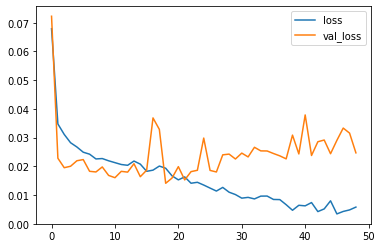

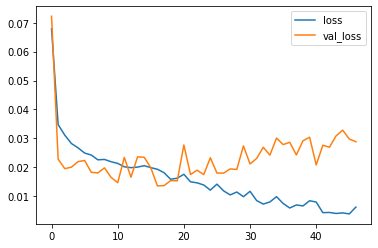

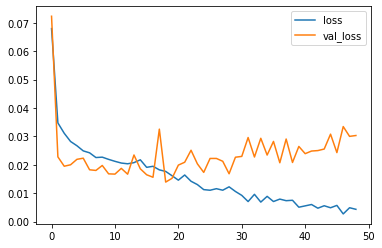

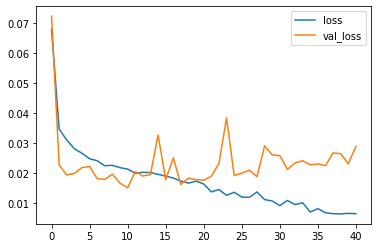

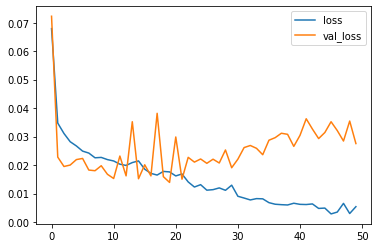

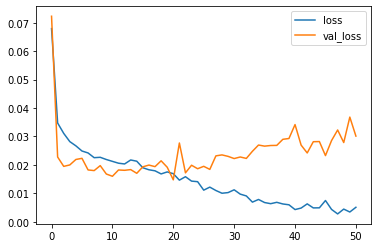

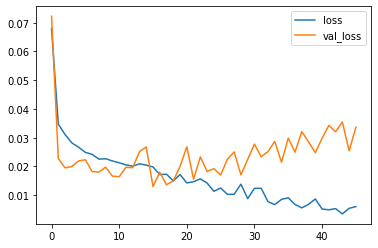

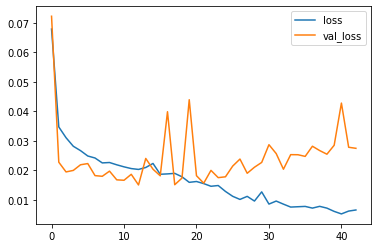

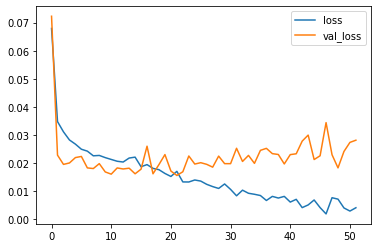

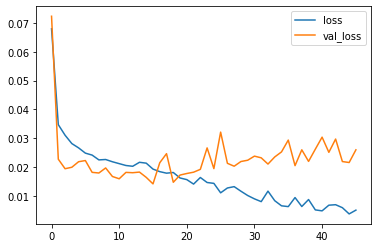

In [ ]:
for j in range(n_reruns):
  # Model Creation
  tf.keras.backend.clear_session() 
  tf.keras.utils.set_random_seed(seed)
  #tf.config.experimental.enable_op_determinism()

  model = keras.Sequential()


  if Method=='RNN':
      Layer_type=SimpleRNN
  elif Method=='LSTM':
      Layer_type=LSTM
  elif Method=='GRU':
      Layer_type=GRU

  n_timesteps = X_train_seq.shape[1]

  n_features  = X_train_seq.shape[2]

  input_shape=(n_timesteps,n_features)
  for i in enumerate(neurons):
      if i[0]==len(neurons)-1:
        model.add(LSTM(units=i[1],input_shape=input_shape,return_sequences=False))   
      else:
        model.add(SimpleRNN(units=i[1],input_shape=input_shape,return_sequences=True))      

  for i in enumerate(dens_neu):
      model.add(keras.layers.Dense(i[1], activation=act))


  model.add(keras.layers.Dense(1, activation='sigmoid'))


  #Best model so far is here
  #Compile Model
  model.compile(loss=loss, optimizer=Adam(learning_rate=learning_rate))
  #model.compile(loss=loss, optimizer='adam')
  #Train Model
  print("Training Model no {}".format(j+1))
  callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
  history = model.fit(verbose = 0,
                          x = X_train_seq,
                          y = y_train_seq,
                          batch_size=batch,
                          epochs=epochs,     
                          validation_split=0.2,
                          #validation_data=(X_valid_seq, y_valid_seq),
                          shuffle=False,
                          validation_steps=None,
                          validation_freq=1,
                          workers=4,
                          use_multiprocessing=False,
                          callbacks=[callback]
                          )

  # print loss curve

  history_df = pd.DataFrame(history.history)
  history_df.loc[0:, ['loss', 'val_loss']].plot()
  print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));


  # Save Model
  export_name = 'RNN_rerun_model_'+str(j+1)
  model.save(export_name)

  # Test Prediction
  # store scores for each model in a dictionary
  y_test_pred=model.predict(X_test_seq).round()
  f1, t_f1, hss, t_hss = errors_classification(y_test_seq, y_test_pred, transitions=True, transition_pos=t_indices_test)
  fm_scores['f1'].append(f1)
  fm_scores['t_f1'].append(t_f1)
  fm_scores['hss'].append(hss)
  fm_scores['t_hss'].append(t_hss)
  
  print("-"*100)
  print()

In [ ]:
# save results
with open(os.path.join(path, 'results/rnn_final_scores.pickle'), 'wb') as file:
  pickle.dump(fm_scores, file)

In [ ]:
# load in results of GRU on the unseen test set
with open(os.path.join(path, 'results/rnn_final_scores.pickle'), 'rb') as file:
  fm_scores = pickle.load(file)

In [ ]:
performance_report(fm_scores)

Validation Scores
------------------------------
f1
Scores: [46.666666666666664, 40.0, 46.101694915254235, 0.0, 35.74144486692015, 39.310344827586206, 40.16736401673641, 0.0, 40.41811846689895, 46.64536741214057]
Mean: 33.505

t_f1
Scores: [34.83870967741935, 30.344827586206897, 32.72727272727273, 0.0, 28.965517241379313, 30.263157894736842, 24.817518248175183, 0.0, 31.84713375796178, 41.21212121212121]
Mean: 25.502

hss
Scores: [0.4626, 0.3957, 0.4564, 0.0, 0.3526, 0.388, 0.3978, 0.0, 0.3993, 0.4617]
Mean: 0.331

t_hss
Scores: [0.0288, 0.0288, -0.0673, 0.0, 0.0096, -0.0192, 0.0096, 0.0, -0.0288, 0.0673]
Mean: 0.003



In [ ]:
run.stop()

In [ ]:
vars_sel

['vis',
 'temp_dew_dist',
 'rh',
 'ceiling',
 'duration',
 'hsig2',
 'dni',
 'dewpt',
 'drybulb',
 'cbl',
 'hlc',
 'ntot',
 'speed',
 'vp',
 'pchar',
 'dir']

In [ ]:
run = neptune.init_run(
    project='swiatej2/fyp',
    api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJjOTQxYjBkZS0zN2Y1LTRhYTQtOGQ1My03YTAxODJkM2E1OWMifQ==',
    name='RNN_LSTM',
    description='trained 10 RNN models with the same parameters and evaluated each on the test set. Computed mean results',

)

performance_report(fm_scores)

run["algorithm"] = 'RNN_LSTM'
run["params"] = params
run['features'] = "\n".join(vars_sel)

run['metrics/f1'] = np.round(np.mean(fm_scores['f1']), 2)
run['metrics/transition_f1'] = np.round(np.mean(fm_scores['t_f1']), 2)
run['metrics/hss'] = np.round(np.mean(fm_scores['hss']), 4)
run['metrics/transition_hss'] = np.round(np.mean(fm_scores['t_hss']), 4)


# only include this for compatible models
#run['metrics/pr_auc'] = final_scores['pr_auc']

# save Precision-Recall curve plot
#img_path = os.path.join(path, 'images/xgb_pr_curve.png')
#final_plots['pr_plot'].plot()
#plt.title("Precision-Recall Curve")
#plt.savefig(img_path)

#run['plots/pr_curve'].upload(img_path)

#run['plots/confusion_matrix'] = npt_utils.create_confusion_matrix_chart(final_model, X_train, X_test, y_train, y_test)

run.stop()


<ipython-input-15-39319b99c047>:1: NeptuneWarning: To avoid unintended consumption of logging hours during interactive sessions, the following monitoring options are disabled unless set to 'True' when initializing the run: 'capture_stdout', 'capture_stderr', and 'capture_hardware_metrics'.
  run = neptune.init_run(


https://app.neptune.ai/swiatej2/fyp/e/FYP-64
Validation Scores
------------------------------
f1
Scores: [46.666666666666664, 40.0, 46.101694915254235, 0.0, 35.74144486692015, 39.310344827586206, 40.16736401673641, 0.0, 40.41811846689895, 46.64536741214057]
Mean: 33.505

t_f1
Scores: [34.83870967741935, 30.344827586206897, 32.72727272727273, 0.0, 28.965517241379313, 30.263157894736842, 24.817518248175183, 0.0, 31.84713375796178, 41.21212121212121]
Mean: 25.502

hss
Scores: [0.4626, 0.3957, 0.4564, 0.0, 0.3526, 0.388, 0.3978, 0.0, 0.3993, 0.4617]
Mean: 0.331

t_hss
Scores: [0.0288, 0.0288, -0.0673, 0.0, 0.0096, -0.0192, 0.0096, 0.0, -0.0288, 0.0673]
Mean: 0.003

Shutting down background jobs, please wait a moment...


<ipython-input-15-39319b99c047>:12: NeptuneUnsupportedType: You're attempting to log a type that is not directly supported by Neptune (<class 'list'>).
        Convert the value to a supported type, such as a string or float, or use stringify_unsupported(obj)
        for dictionaries or collections that contain unsupported values.
        For more, see https://docs.neptune.ai/help/value_of_unsupported_type
  run["params"] = params


Done!
Waiting for the remaining 14 operations to synchronize with Neptune. Do not kill this process.
All 14 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/swiatej2/fyp/e/FYP-64/metadata
